In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [98]:
df=pd.read_csv("train.csv")
df1=pd.read_csv("test.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
print("number of Rows =",df.shape[0], "\nnumber of Columns =",df.shape[1])

number of Rows = 891 
number of Columns = 12


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Age
  ### conclusions :
#### 1]Age is normally(almost) distributed
#### 2]20% of the values are missing
#### 3]There are some outliers


In [16]:
df['Age'].describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

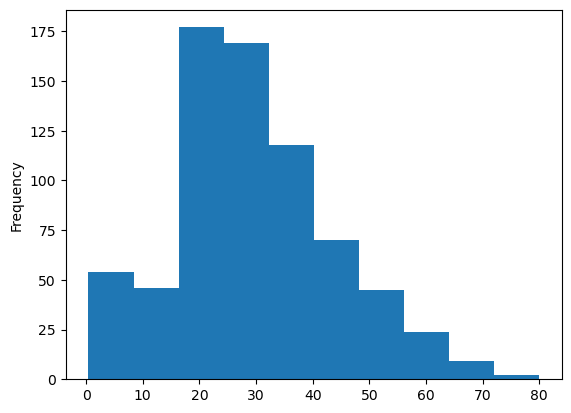

In [17]:
df['Age'].plot(kind='hist')

In [18]:
df['Age'].skew()

np.float64(0.38910778230082704)

<Axes: >

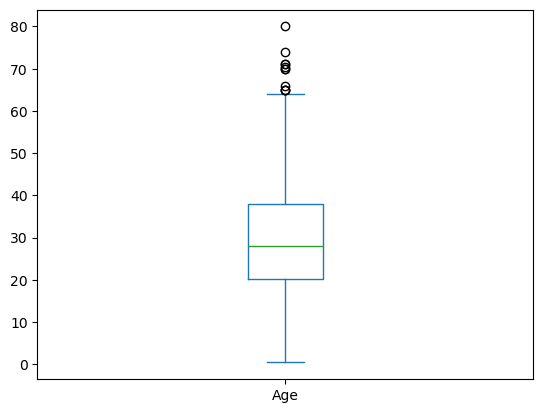

In [19]:
df['Age'].plot(kind='box')

In [20]:
df['Age'].isnull().sum()/len(df['Age'])

np.float64(0.19865319865319866)

## Fare
 #### conclusions:
   ##### 1]The data is highly(positively) skewed
   ##### 2]Fare col actually contains the group fare and not the individual fare(This migth be and issue)
   ##### 3]We need to create a new col called individual fare

In [21]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Density'>

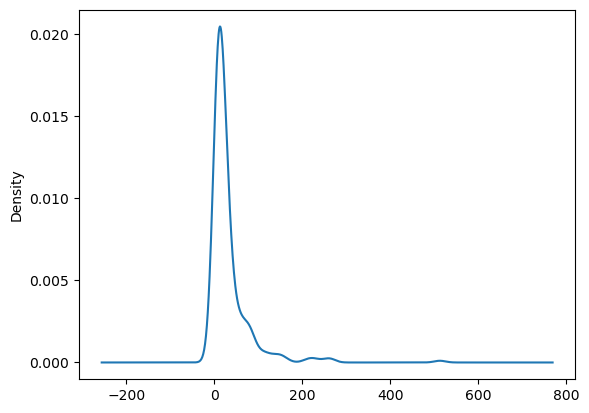

In [22]:
df['Fare'].plot(kind='kde')

In [23]:
df['Fare'].skew()

np.float64(4.787316519674893)

In [24]:
df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [25]:
df['Fare'].isnull().sum()

np.int64(0)

### Embarked
  #### conclusion:
  ##### Most passengers embarked from S (Southampton)

In [32]:
df['Embarked'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [31]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

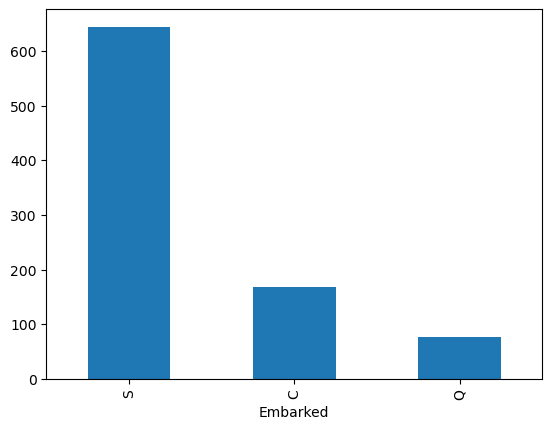

In [33]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

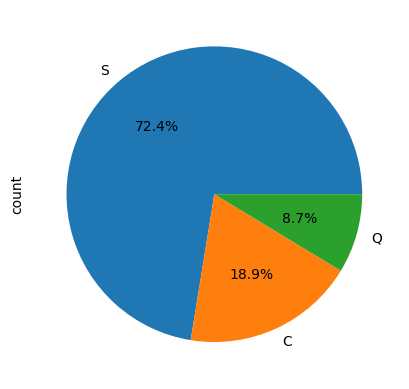

In [34]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Survived
   #### conclusion:
##### 61.6% people was died and 38.4% are survived 

In [35]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

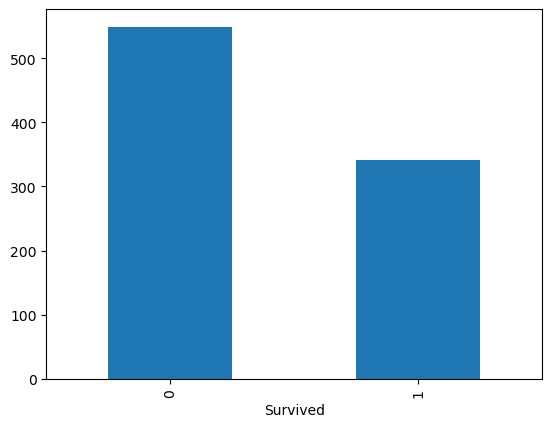

In [36]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

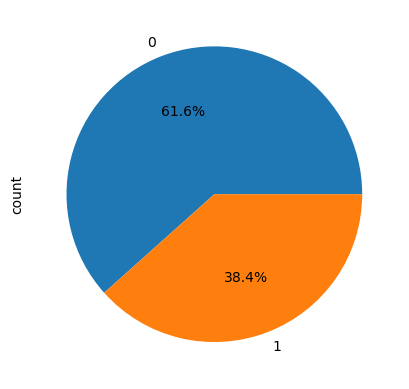

In [37]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')

## Pclass
### Most of people travelled in Pclass 3 
### surprisingly less people are travelled in Pclass 2 and more people are traveller in Pclass 1

In [38]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

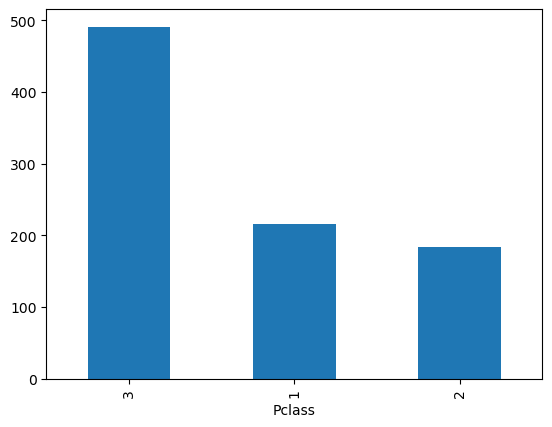

In [39]:
df['Pclass'].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

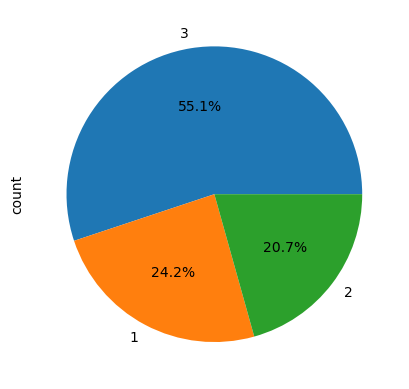

In [40]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')

## sex
### conclusion:
#### there are 577 are males and 314 femals


In [41]:
df['Sex'].value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

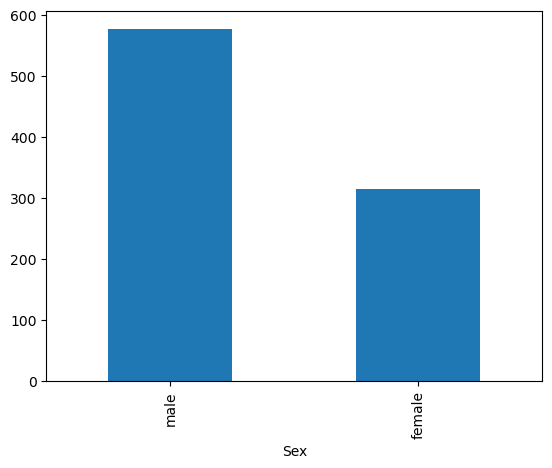

In [42]:
df['Sex'].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

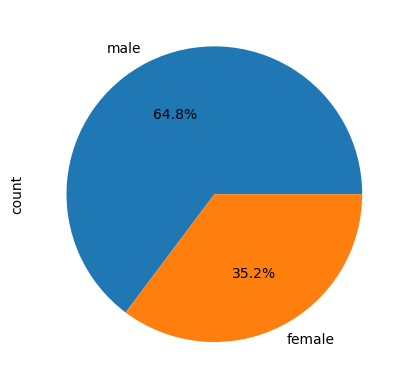

In [45]:
df['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [43]:
df['Sex'].isnull().sum()

np.int64(0)

### Survived
#### conclusions

#### Parch and SibSp cols can be merged to form a new col call family_size
#### Create a new col called is_alone

In [47]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

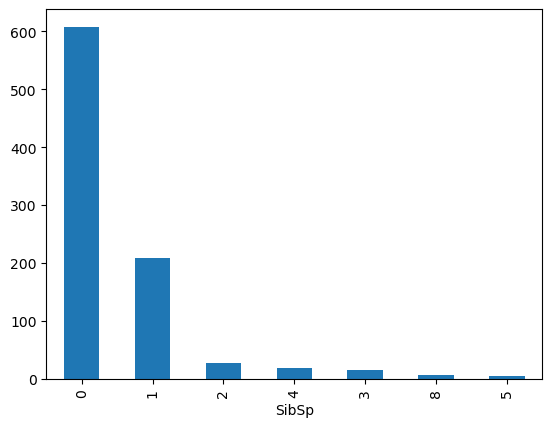

In [48]:
df['SibSp'].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

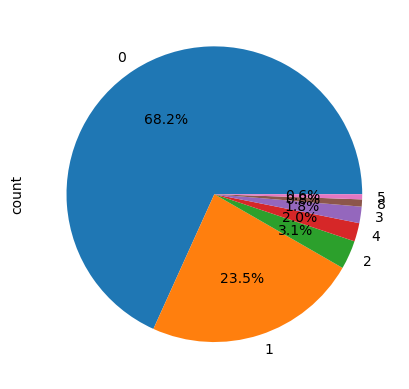

In [50]:
df['SibSp'].value_counts().plot(kind="pie",autopct='%0.1f%%')

In [51]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

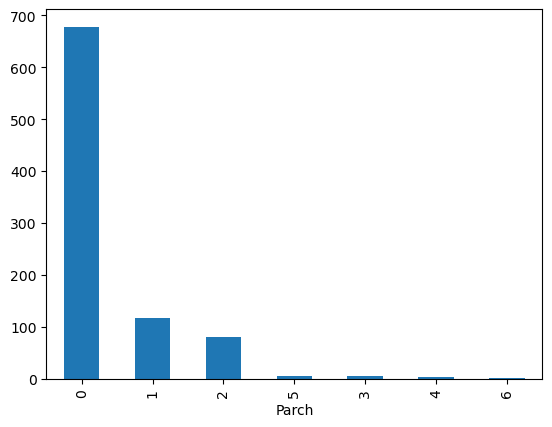

In [52]:
df['Parch'].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

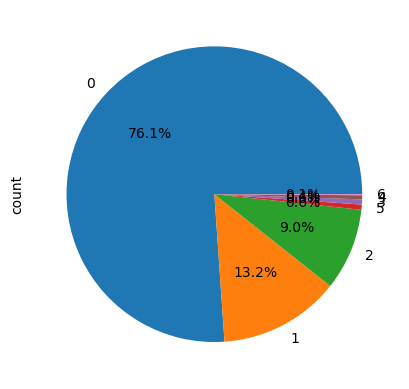

In [53]:
df['Parch'].value_counts().plot(kind="pie",autopct='%0.1f%%')

In [54]:
df['Parch'].isnull().sum()

np.int64(0)

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Survival rate in each Pclass

In [88]:
pd.crosstab(df['Survived'], df['Pclass'], normalize='columns') * 100


Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

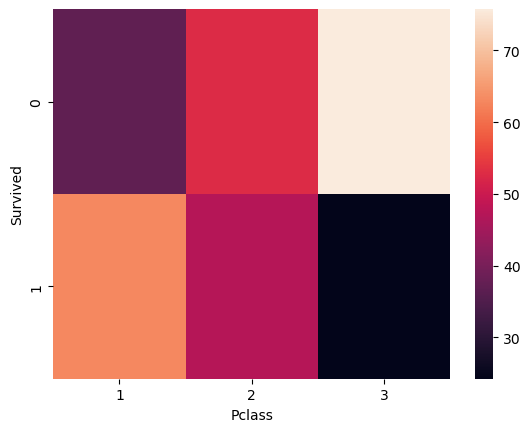

In [91]:
sns.heatmap(
    pd.crosstab(df['Survived'], df['Pclass'], normalize='columns') * 100
)


#### Survival rate of sex

In [87]:

pd.crosstab(
    df['Survived'],
    df['Sex'],
    normalize='index'
) * 100


Sex,female,male
Survived,,
0,14.754098,85.245902
1,68.128655,31.871345


<Axes: xlabel='Sex', ylabel='Survived'>

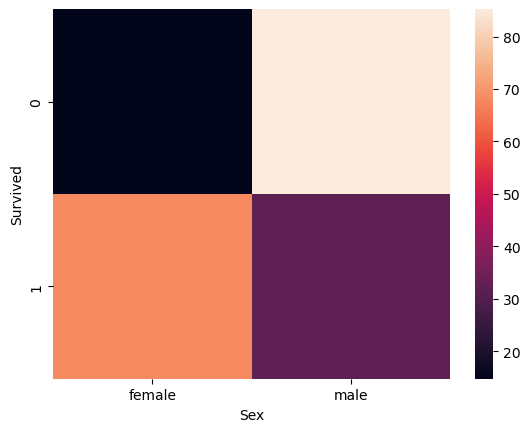

In [93]:
sns.heatmap(
    pd.crosstab(
    df['Survived'],
    df['Sex'],
    normalize='index'
) * 100

   
)

 ### Survival rate in each Embarked

In [94]:
pd.crosstab(
    df['Survived'],
    df['Embarked'],
    normalize='index'
) * 100

Embarked,C,Q,S
Survived,,,
0,13.661202,8.561020,77.777778
1,27.352941,8.823529,63.823529


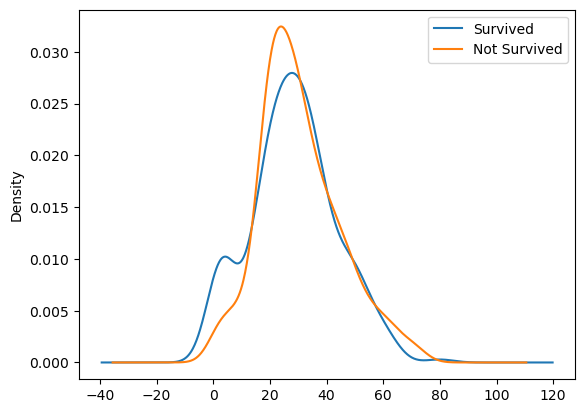

In [95]:
# survived and age

df[df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

In [99]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [100]:
df = pd.concat([df,df1])

### Create a new columns

In [101]:
df['individual_fare'] = df['Fare']/(df['SibSp'] + df['Parch'] + 1)

In [102]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000


### Create a family_sizee columns

In [105]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [106]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1


### Create the new columns Family_type

In [107]:
# family_type
# 1 -> alone
# 2-4 -> small
# >5 -> large

def transform_family_size(num):

  if num == 1:
    return 'alone'
  elif num>1 and num <5:
    return "small"
  else:
    return "large"

In [108]:
df['family_type'] = df['family_size'].apply(transform_family_size)

In [109]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,alone


### Survival rate of family type

In [110]:
pd.crosstab(df['Survived'],df['family_type'],normalize='columns')*100

family_type,alone,large,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


<Axes: xlabel='family_type', ylabel='Survived'>

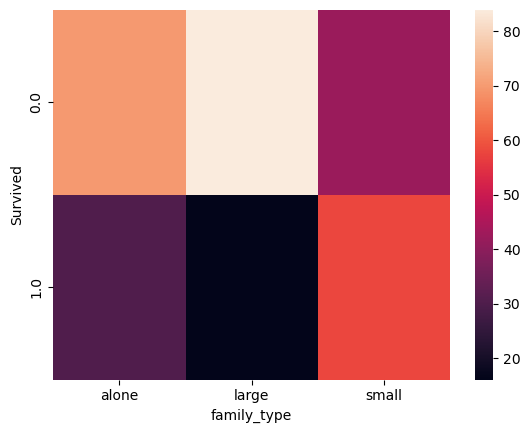

In [111]:
sns.heatmap(pd.crosstab(df['Survived'],df['family_type'],normalize='columns')*100)

In [112]:
df['surname'] = df['Name'].str.split(',').str.get(0)

In [113]:
df['title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [114]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,small,Braund,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small,Cumings,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,alone,Heikkinen,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small,Futrelle,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,alone,Allen,Mr.


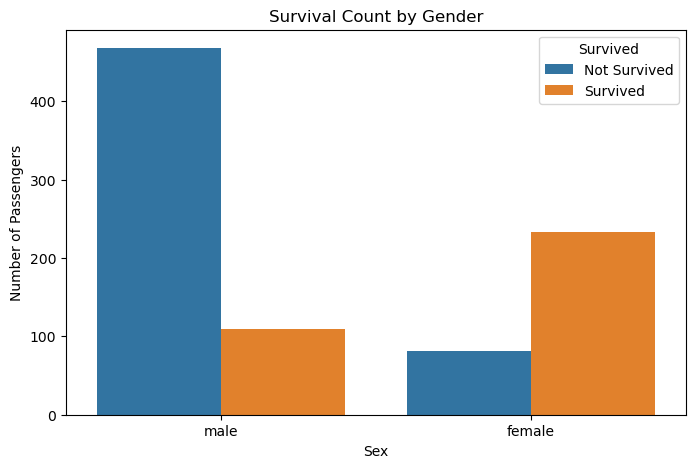

In [115]:
plt.figure(figsize=(8, 5))

sns.countplot(
    data=df,
    x='Sex',
    hue='Survived'
)

plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])

plt.show()

In [129]:
df['Cabin'].isnull().sum()/len(df['Cabin'])

np.float64(0.774637127578304)

In [130]:
df['Cabin'].fillna('M',inplace=True)

C:\Users\kabur\AppData\Local\Temp\ipykernel_30964\3032343573.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('M',inplace=True)


In [131]:
df['Cabin'].value_counts()

Cabin
M                  1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
F33                   4
                   ... 
C39                   1
B24                   1
D40                   1
D38                   1
C105                  1
Name: count, Length: 187, dtype: int64

In [134]:
df['deck'] = df['Cabin'].str[0]

In [135]:
df['deck'].value_counts()

deck
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [136]:
pd.crosstab(df['deck'],df['Pclass'])

Pclass,1,2,3
deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


<Axes: xlabel='deck'>

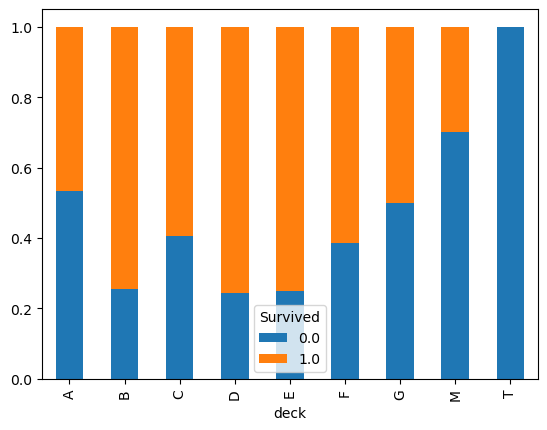

In [138]:
pd.crosstab(df['deck'],df['Survived'],normalize='index').plot(kind='bar',stacked=True)

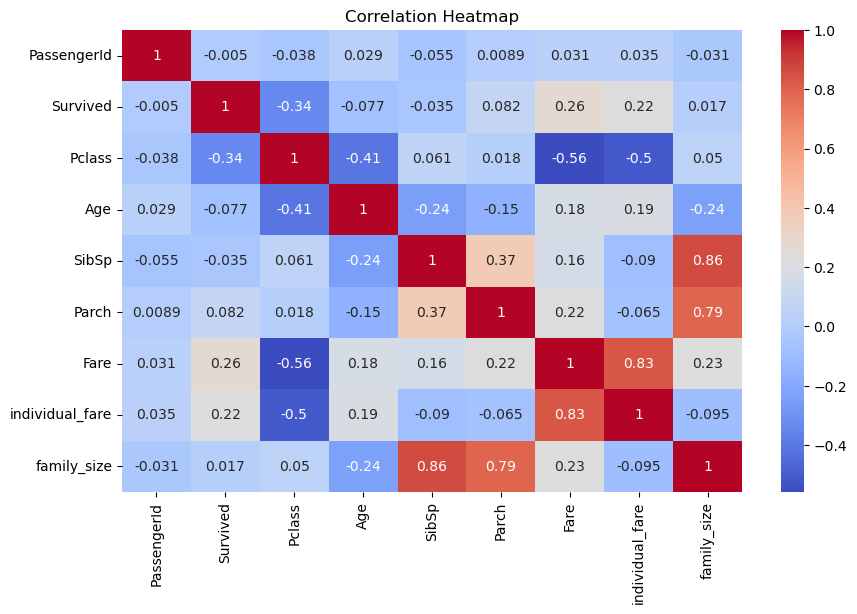

In [140]:
numeric_df = df.select_dtypes(include='number')
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Conclsion
   ### 1]Gender had the most significant impact
##### Women had a much higher survival rate than men.

##### Reflects the “women and children first” evacuation policy.

### 2]Passenger class strongly influenced survival

#### First-class passengers were more likely to survive.

#### Lower-class passengers had lower survival rates, showing the role of social and economic status.

### Age had a moderate effect

### Children had better survival chances than adults.

### Elderly passengers were the most vulnerable.

### Overall conclusion

### Survival was influenced by social structure and access to resources, not just chance.

### The disaster highlights how gender, class, and age determined survival outcomes